# Data analysis

All the data analysed here was generated using the scripts in this repository.

This notebook analyses the results for the runs performed on the reduced dataset (manually retreived structures, prior to using `build_result_db.py`)


In [31]:
import glob
import os
from warnings import catch_warnings, simplefilter

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib_venn import venn3

import numpy as np
import pandas as pd
from tabulate import tabulate

In [2]:
from data_analysis import *

## Load all data

Multiple different architectures have been used and with two different conditions - where the cell parameters were and were not optimised.
However, not all architectures were run with all files (yet):

In [3]:
csv_files = glob.glob(os.path.join(RESULTS_DIR, '*.csv'))

In [4]:
data = [Data(path) for path in sorted(csv_files)]
print(tabulate([[d.name, d.arch, d.mp, d.cell, d.df.shape[0]] for d in data],
               headers=['name', 'arch', 'model path', 'cell', 'number of structures']))

name                                      arch      model path                cell      number of structures
----------------------------------------  --------  ------------------------  ------  ----------------------
chgnet_None_cell                          chgnet    None                      True                       283
chgnet_None_no_cell                       chgnet    None                      False                      283
mace_mp_large_cell                        mace_mp   large                     True                       283
mace_mp_large_no_cell                     mace_mp   large                     False                      283
mace_mp_mace-mp-0b3-medium.model_cell     mace_mp   mace-mp-0b3-medium.model  True                       283
mace_mp_mace-mp-0b3-medium.model_no_cell  mace_mp   mace-mp-0b3-medium.model  False                      283
mace_mp_mace-omat-0-medium.model_cell     mace_mp   mace-omat-0-medium.model  True                       283
mace_mp_mace-omat-0

### Reduced dataset

First we identify the reduced dataset and subselect those values for each run

In [5]:
small_runs = [d for d in data if len(d.df['optimisation'].dropna()) < 100]
print(tabulate([[d.name, d.arch, d.mp, d.cell, len(d.df['optimisation'].dropna())] for d in small_runs],
               headers=['name', 'arch', 'model path', 'cell', 'number of structures']))

name                                      arch      model path                cell      number of structures
----------------------------------------  --------  ------------------------  ------  ----------------------
chgnet_None_cell                          chgnet    None                      True                        59
chgnet_None_no_cell                       chgnet    None                      False                       59
mace_mp_large_cell                        mace_mp   large                     True                        59
mace_mp_mace-mp-0b3-medium.model_cell     mace_mp   mace-mp-0b3-medium.model  True                        59
mace_mp_mace-mp-0b3-medium.model_no_cell  mace_mp   mace-mp-0b3-medium.model  False                       59
mace_mp_mace-omat-0-medium.model_cell     mace_mp   mace-omat-0-medium.model  True                        59
sevennet_None_cell                        sevennet  None                      True                        59
sevennet_None_no_ce

In [6]:
selected = set()
selected = selected.union(*[set(d.df['compound'][d.df['optimisation'].notna()].tolist()) for d in small_runs])
len(selected)

58

In [7]:
for d in data:
    d.df = d.df[d.df['compound'].isin(selected)]

In [8]:
data[0].df

,compound,id,instrument,method,temperature,optimisation,supercell,imaginary_modes,score_filtered,score_direct,which,is_organic,is_inorganic,is_organometallic,is_polymeric,formula,n_rings,n_aromatic_rings,n_fused_rings
0,acenapthene_1867647,1867647,TFXA,?,?,success,1 0 0 0 2 0 0 0 2,FAILED,NaN,NaN,organic,True,False,False,False,C24 H20,6,4,6
1,acetanilide_614360,614360,TFXA,?,?,not_converged,NaN,NaN,NaN,NaN,organic,True,False,False,False,C8 H9 N1 O1,1,1,0
2,acetic acid_251389,251389,TOSCA,?,?,success,2 2 2,FAILED,NaN,NaN,organic,True,False,False,False,C2 H4 O2,0,0,0
4,acetonitrile_114872,114872,TFXA,?,?,success,2 2 2,FAILED,NaN,NaN,organic,True,False,False,False,C2 H3 N1,0,0,0
6,N-Acetyl-p-aminophenol _129925,129925,TOSCA,?,?,success,2 2 2,FAILED,NaN,NaN,organic,True,False,False,False,C8 H9 N1 O2,1,1,0
7,Adamantane_1101164,1101164,TFXA,?,?,not_converged,NaN,NaN,NaN,NaN,organic,True,False,False,False,C10 H16,4,0,0
8,2-adamantanone_1010604,1010604,TFXA,?,?,success,2 2 2,FAILED,NaN,NaN,organic,True,False,False,False,C10 H14 O1,4,0,0
10,L-alanine_1917813,1917813,TOSCA1,?,?,success,3 0 0 0 3 0 0 0 2,FAILED,NaN,NaN,organic,True,False,False,False,C3 H7 N1 O2,0,0,0
12,alanine_dipeptide_1102144,1102144,TFXA,?,?,success,2 2 2,FAILED,NaN,NaN,organic,True,False,False,False,C6 H12 N2 O3,0,0,0
14,aluminium_trihydride_1681354,1681354,TFXA,?,?,success,2 2 2,FAILED,NaN,NaN,organometallic,False,True,True,False,(H3 Al1)n,0,0,0


In [9]:
print(tabulate([[d.name, d.arch, d.mp, d.cell, len(d.df['optimisation'].dropna())] for d in data],
               headers=['name', 'arch', 'model path', 'cell', 'number of structures']))

name                                      arch      model path                cell      number of structures
----------------------------------------  --------  ------------------------  ------  ----------------------
chgnet_None_cell                          chgnet    None                      True                        59
chgnet_None_no_cell                       chgnet    None                      False                       59
mace_mp_large_cell                        mace_mp   large                     True                        59
mace_mp_large_no_cell                     mace_mp   large                     False                       59
mace_mp_mace-mp-0b3-medium.model_cell     mace_mp   mace-mp-0b3-medium.model  True                        59
mace_mp_mace-mp-0b3-medium.model_no_cell  mace_mp   mace-mp-0b3-medium.model  False                       59
mace_mp_mace-omat-0-medium.model_cell     mace_mp   mace-omat-0-medium.model  True                        59
mace_mp_mace-omat-0

In [10]:
n_structures = len(data)
ncol = 2
if n_structures % ncol == 0:
    nrow = int(n_structures / ncol)
else:
    raise Exception()
print(ncol, nrow)

2 5


#### Composition by system type

As can be seen in the plots below, this dataset is dominated by organic molecules, which could potentially be because the ISIS INS database itself may lean towards 
organic compounds, or because the subset of molecules that were obtained manually from the database simply happened to be biased that way.

In either case, though, this dataset is less biased than the full one

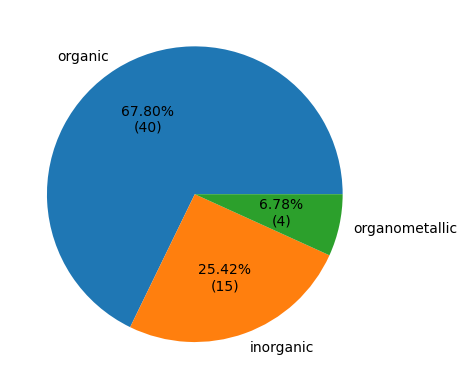

In [11]:
fig, ax = plt.subplots()

plot_column_pie(data[0].df, ax, 'which', True)

plt.show()

This first plot above shows the mutually exclusive composition where a molecule:

- is **organic** if it is in the CSD database and the CSD `is_organometallic` property is `False`
- is **inorganic** if it is NOT in the CSD database and when the CIF file is loaded onto the CSD Python package,
  the `is_organometallic` property is `False`
- is **organometallic** if CSD Python packages `is_organometallic` property is `True`

In [12]:
data[0].df[data[0].df['which'] == 'organometallic']['compound']

14              aluminium_trihydride_1681354
59        barium_rhenium_nonahydride_1636109
100              copper_(II)_hydroxide_68459
101    Copper sulfate(VI) pentahydrate_20657
Name: compound, dtype: object

A closer look at the organometallic structures reveals that none of them are, in fact, organometallic. The inorganic compounds, at least,
all appear to be fine:

In [13]:
data[0].df[data[0].df['which'] == 'inorganic']['compound']

20                 ammonium_fluoride_1595684
26                  ammonium_nitrate_1592576
27               ammonium_persulfate_2103460
29                  ammonium_sulfate_1596507
30     ammonium_tetrafluoroberyllate_1593818
54       barium_chlorate_monohydrate_1604771
55                    barium_hydride_1672558
57      barium_hydroxide_octahydrate)1606483
74                          boric_acid_61365
83                               C60_9011580
164                                hcl_28843
176                      lithium_amide_10354
178      lithium_hydroxide_monohydrate_35155
179                    Magnesium amide_16222
243                                nah_33670
Name: compound, dtype: object

In [14]:
data[0].df[data[0].df['which'] == 'organic']['compound']

0                                    acenapthene_1867647
1                                     acetanilide_614360
2                                     acetic acid_251389
4                                    acetonitrile_114872
6                         N-Acetyl-p-aminophenol _129925
7                                     Adamantane_1101164
8                                 2-adamantanone_1010604
10                                     L-alanine_1917813
12                             alanine_dipeptide_1102144
15                                 ammonia_borane_622375
16                              ammonium_benzoate_762137
32                                        aniline_893032
33                             anilinium_chloride_299875
34                                    anthracene_1432438
38                                 anthraquinone_1103146
39                                   anthrarufin_1139944
40                                      anthrone_1103152
42                             

Thanks to the small size of the dataset, it is possible to inspect all the organic compound as well - all of them appear to be correctly 
identified. A debate could be had about ammonia borane, but it could feasibly be considered organic by some metrics.

Similarly, given the size of the dataset, it is possible to switch the values manually:

In [15]:
for d in data:
    d.df.loc[d.df['which'] == 'organometallic', 'which'] = 'inorganic'

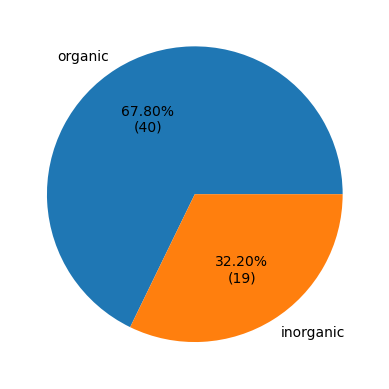

In [16]:
fig, ax = plt.subplots()

plot_column_pie(data[0].df, ax, 'which', True)

plt.show()

We can also have a look at an alternative view of the organic/inorganic/organometallic problem, one that 
is not mutuall exclusive. For this one, simply the `is_organic` and `is_organometallic` methods were 
used to generate the sets:

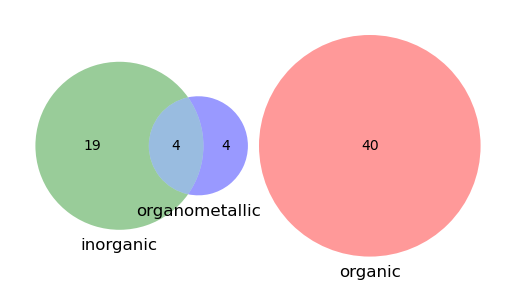

In [17]:
fig, ax = plt.subplots()

organic = data[0].df['is_organic']
inorganic = data[0].df['is_inorganic']
organometallic = data[0].df['is_organometallic']

venn3((organic.sum(), 
       inorganic.sum(), 
       (organic & inorganic).sum(), 
       organometallic.sum(),
       (organic & organometallic).sum(), 
       (inorganic & organometallic).sum(),
       0),
      ('organic', 'inorganic', 'organometallic'))

In [18]:
data[0].df[data[0].df['is_organometallic'] == True]['compound']

14              aluminium_trihydride_1681354
59        barium_rhenium_nonahydride_1636109
100              copper_(II)_hydroxide_68459
101    Copper sulfate(VI) pentahydrate_20657
Name: compound, dtype: object

In this more nuanced view, we *could* say that aluminium trihydride and barium rhenium nonahydride are both inorganic and organometallic,
but for simplicity, we can switch them all to be only inorganic

In [19]:
for d in data:
    d.df.loc[d.df['is_organometallic'] == True, 'is_organometallic'] = False

C:\Users\dni83241\AppData\Local\miniconda3\envs\phonons\lib\site-packages\matplotlib_venn\layout\venn3\pairwise.py:111: UserWarning: Circle C has zero area.
  warnings.warn("Circle C has zero area.")


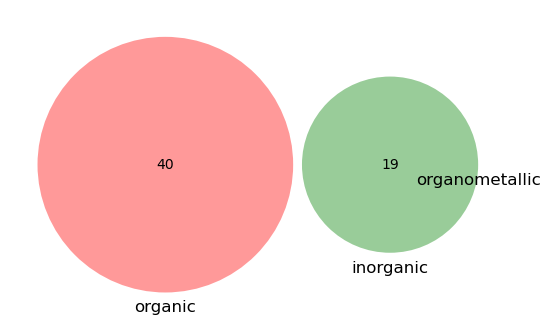

In [20]:
fig, ax = plt.subplots()

organic = data[0].df['is_organic']
inorganic = data[0].df['is_inorganic']
organometallic = data[0].df['is_organometallic']

venn3((organic.sum(), 
       inorganic.sum(), 
       (organic & inorganic).sum(), 
       organometallic.sum(),
       (organic & organometallic).sum(), 
       (inorganic & organometallic).sum(),
       0),
      ('organic', 'inorganic', 'organometallic'))

#### Number of rings

This dataset contains a decent distribution of compounds with rings in them. As expected, 
there are fewer compounds with larger ring counts, but that should be fairly representative.

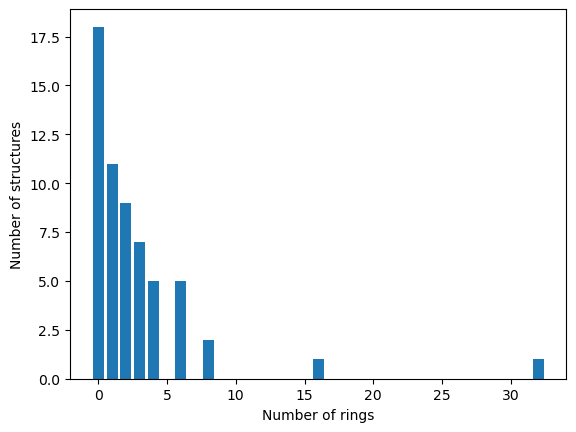

In [21]:
plot_basic_bar(data[0].df['n_rings'], xlabel='Number of rings')

#### Number of aromatic rings

This is a similar case - there is a distribution of differently aromatic compounds.

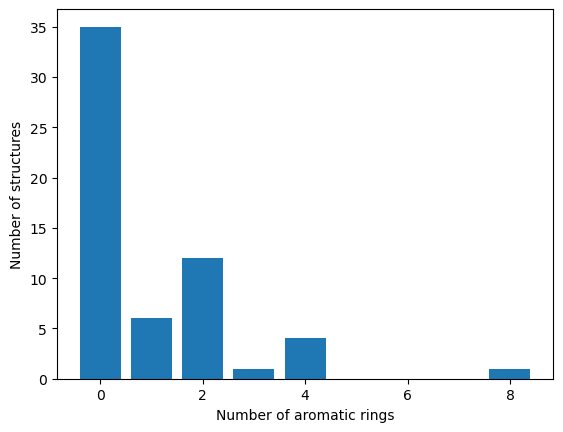

In [22]:
plot_basic_bar(data[0].df['n_aromatic_rings'], xlabel='Number of aromatic rings')

#### Number of fused rings

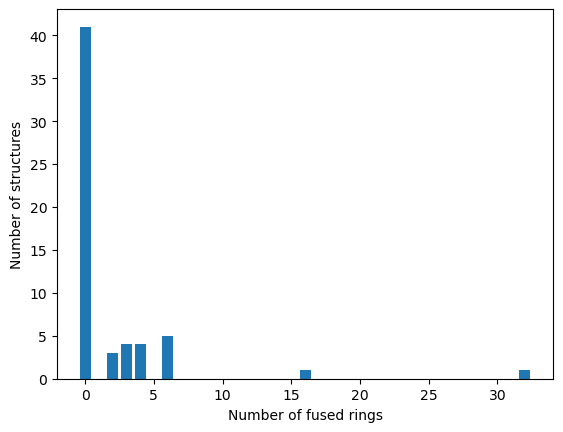

In [23]:
plot_basic_bar(data[0].df['n_fused_rings'], xlabel='Number of fused rings')

## Analyse optimisation results

All architectures under all conditions were optimised for up to 2000 steps of the LBFGS ase optimiser and FMAX=1e-6, 
using janus_core.geomopt.GeomOpt.
However, some of the architectures had to be run with a higher FMAX threshold because the default resulted in a large number of
structures not converging at all:

- sevennet -> FMAX=1e-5
- chgnet -> FMAX=1e-4

### Environment

The following environemnt was used in this stage of the pipeline:

```
alignn                   2024.5.27
ase                      3.24.0
chgnet                   0.4.0
e3nn                     0.4.4
janus-core               0.7.1
mace-torch               0.3.10
numpy                    1.26
phonopy                  2.27.0
pytorch-lightning        2.5.0.post0
scikit-learn             1.6.1
scipy                    1.14.1
seekpath                 1.9.7
sevenn                   0.10.4
spglib                   2.5.0
torch                    2.6.0
```

### Convergence

Below plot shows the number of structures that converged, did not converged, and those whose space group changed
during optimisation even with ase constraints applied. Each row shows a different foundational MLIP, with the first
column showing the variation where the cell lengths (but not angles) were optimised, and the second column shows 
those where the cell was constants and only the positions of atoms were optimised.

Interestingly, the optimisation of positions only did significantly better for all cases except MACE-MP large.
Suprprisingly, 7net was able to optimise the most systems and MACE-MP Large did fairly poorly. Unsurprisingly,
the newer MACE-MP models did very well.

Another interesting observation is that the MACE-MP models tend to fail due to space group changing while the
others do due to not converging instead.

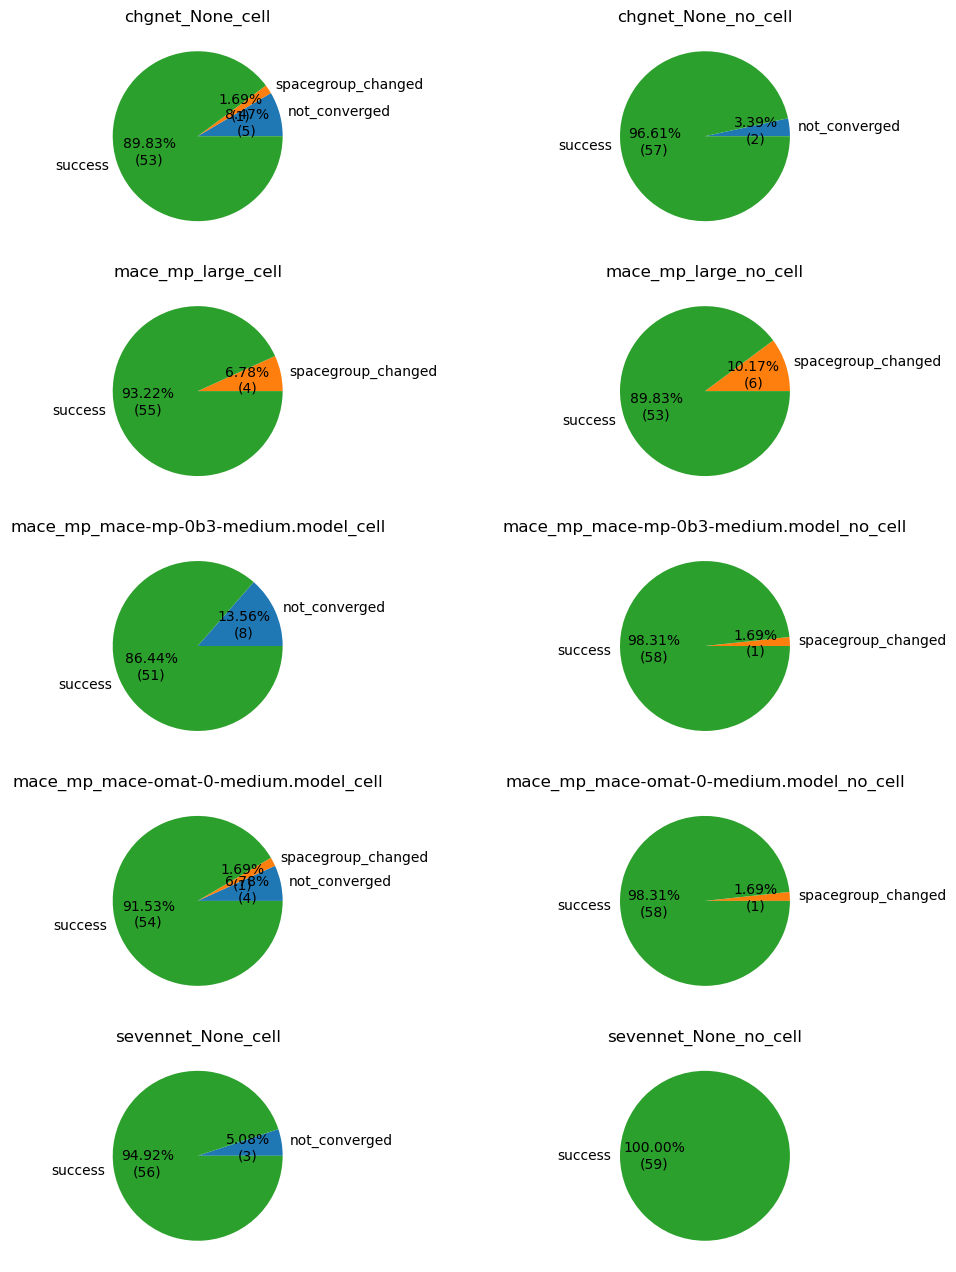

In [88]:
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 16))
axs = axs.flatten()
labels = list(set().union(*[d.df['optimisation'].unique() for d in data]))

for i, d in enumerate(data):
    plot_column_pie(d.df, axs[i], 'optimisation', True, labels, False)
    
    axs[i].set_title(d.name)

plt.show()

### Which compounds are the problem?

To look at the underlying patterns, the figure below shows the distribution in the type of the
compound (organic/inorganic) for the failed runs (either not converged or space group changed).

It can be clearly seen that a significant majority of all failures is organic, with the proportion
being higher than the bias of the data would suggest. That said, though, the dataset is not 
large enough to draw conclusions - it is entirely possible that the gathered organic structures 
happen to be more difficult.

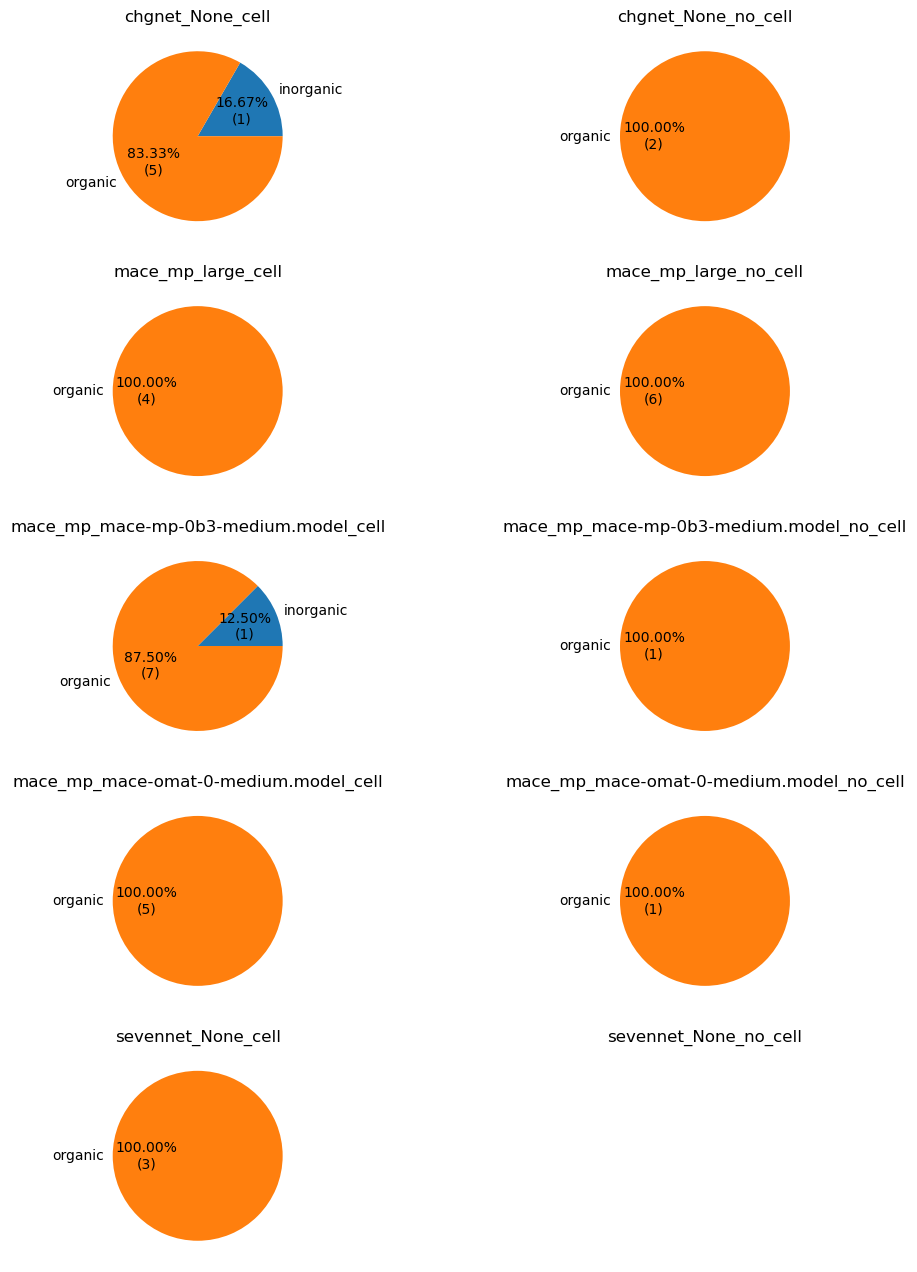

In [90]:
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 16))
axs = axs.flatten()
labels = list(set().union(*[d.df['which'].unique() for d in data]))

for i, d in enumerate(data):
    plot_column_pie(d.df[d.df['optimisation'].isin(['not_converged', 'spacegroup_changed'])], axs[i], 'which', True, labels, False)
    
    axs[i].set_title(d.name)

plt.show()

### Is aromaticity the problem?

The below figure shows the number of aromatic rings of failed structures. There does not seem to be
any trend.

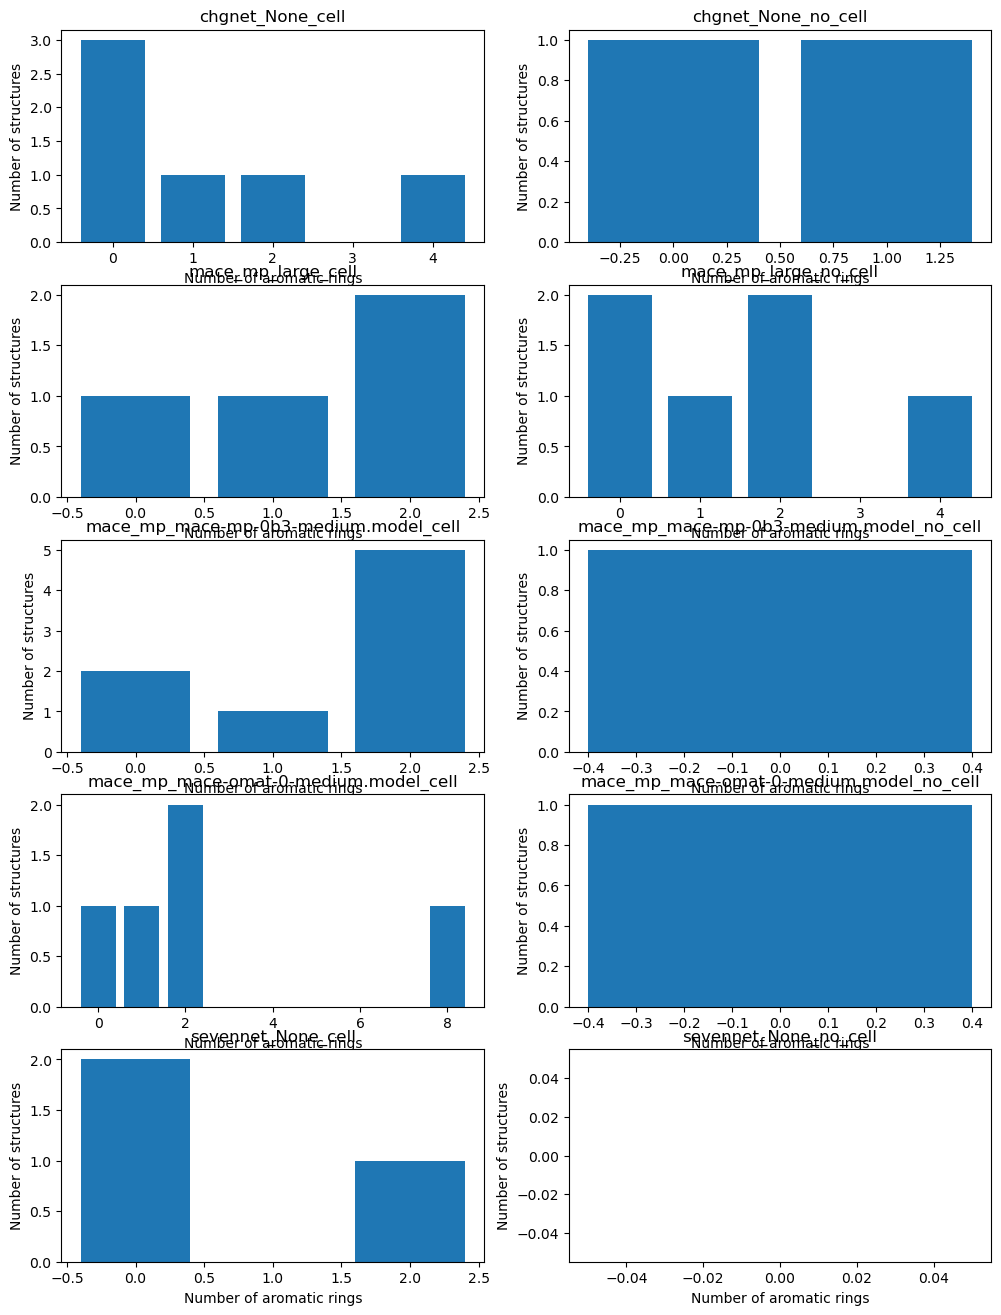

In [92]:
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 16))
axs = axs.flatten()

for i, d in enumerate(data):
    plot_basic_bar(d.df.loc[d.df['optimisation'].isin(['not_converged', 'spacegroup_changed']), 'n_aromatic_rings'], 
                   axs[i], xlabel='Number of aromatic rings')
    
    axs[i].set_title(d.name)

plt.show()

In [89]:
headers = ['run', 'not_converged', 'spacegroup_changed']

contents = []
for d in data:
    not_converged = '\n'.join(d.df[d.df['optimisation'] == 'not_converged']['compound'].values)
    sg_changed = '\n'.join(d.df[d.df['optimisation'] == 'spacegroup_changed']['compound'].values)

    contents.append([d.name, not_converged, sg_changed])

print(tabulate(contents, headers=headers, tablefmt="grid"))

+------------------------------------------+-----------------------------------------------------------+--------------------------+
| run                                      | not_converged                                             | spacegroup_changed       |
+==========================================+===========================================================+==========================+
| chgnet_None_cell                         | acetanilide_614360                                        | ammonium_sulfate_1596507 |
|                                          | Adamantane_1101164                                        |                          |
|                                          | aripiprazole_iii_285534                                   |                          |
|                                          | 2,7-Dioctyl[1]benzothieno[3,2-b][1]benzothiophene_2091417 |                          |
|                                          | propane_1511803                

## Phonon calculations

All phonon calculations were run with the `run_phonons.py` script, where `fhi-vibes` was used for supercell determination. 
However, the runs that were done on the updated, full list of systems, were run with the `--force-symmetric` option to 
ensure that all the results would be readable by euphonic.

The phonons were then analysed using the `analyse_phonons.py` script with the default imaginary mode tolerance (1e-3).

### Environment

```
ase                      3.23.0
chgnet                   0.4.0
e3nn                     0.4.4
euphonic                 1.3.2
fhi-vibes                1.0.5
janus-core               0.6.6
mace-torch               0.3.8
phonopy                  2.32.0
scikit-learn             1.6.1
scipy                    1.14.1
seekpath                 1.9.7
sevenn                   0.10.4
spglib                   2.3.0
torch                    2.6.0
```

### Success

The figure below shows the number of each outcome of the phonon calculation:

- GREAT - no imaginary modes
- OK - there are imaginary modes, but after applying the correction they disappear
- ACCEPTABLE - there are imaginary modes, but after applying the correction they are within the tolerance (1e-3)
- WEIRD-OK - no imaginary modes, but when the correction is applied, there are some but within the tolerance(1e-3)
- WEIRD-FAIL - no imaginary modes, but when the correction is applied, imaginary modes appear that are larger than tolerance (1e-3)
- FAILED - there are imaginary modes, and after applying the correction, they remain larger than the tolerance (1e-3)

Surprisingly, `chgnet` calculations failed for the vast majority of the compounds, with `7net` being also very bad. The MACE models
did generally much better, but they also failed more than half the time.

Another surprise is that newer MACE models did much worse here than the original MACE-MP large, the opposite of the optimisation
results. 

With the exception of `7net`, the cases where the cell lenghts were optimised did better than those where only
the positions were optimised, once again showing the opposite trend to the optimisation results. In this case,
this could have been caused by the fact that these optimised cells resulted in an overall lower-energy system
that was better positioned for the phonon calculation. Or, it might be possible that the cell optimisation 
shrunk the size of the cell, therefore allowing the supercell algorithm to construct a larger cell, leading
to better results in the phonon calculation.

['WEIRD-FAIL', 'FAILED', 'WEIRD-OK', 'ACCEPTABLE']


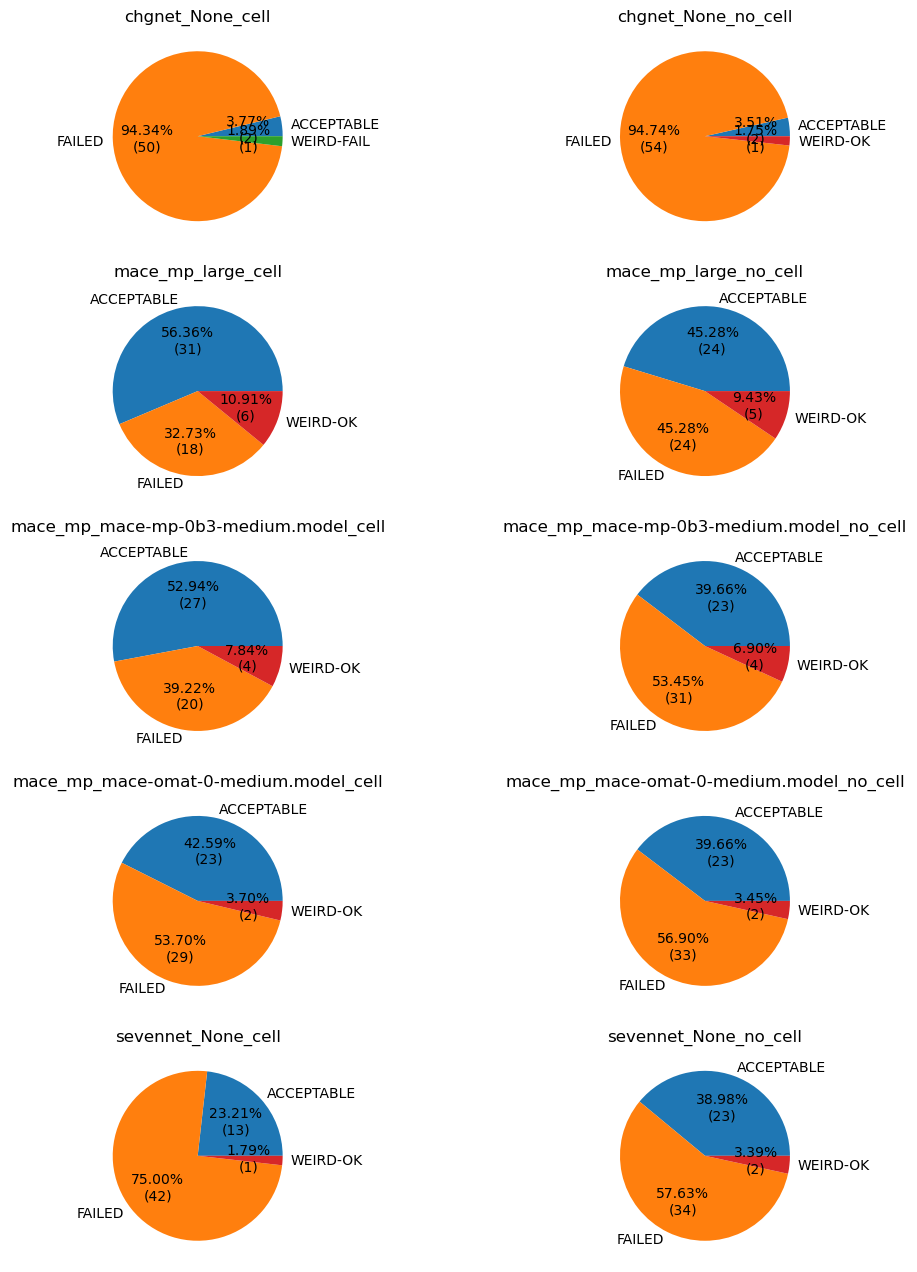

In [95]:
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 16))
axs = axs.flatten()
labels = list(set().union(*[d.df['imaginary_modes'].dropna().unique() for d in data]))

for i, d in enumerate(data):
    plot_column_pie(d.df, axs[i], 'imaginary_modes', True, labels, False)
    
    axs[i].set_title(d.name)

plt.show()

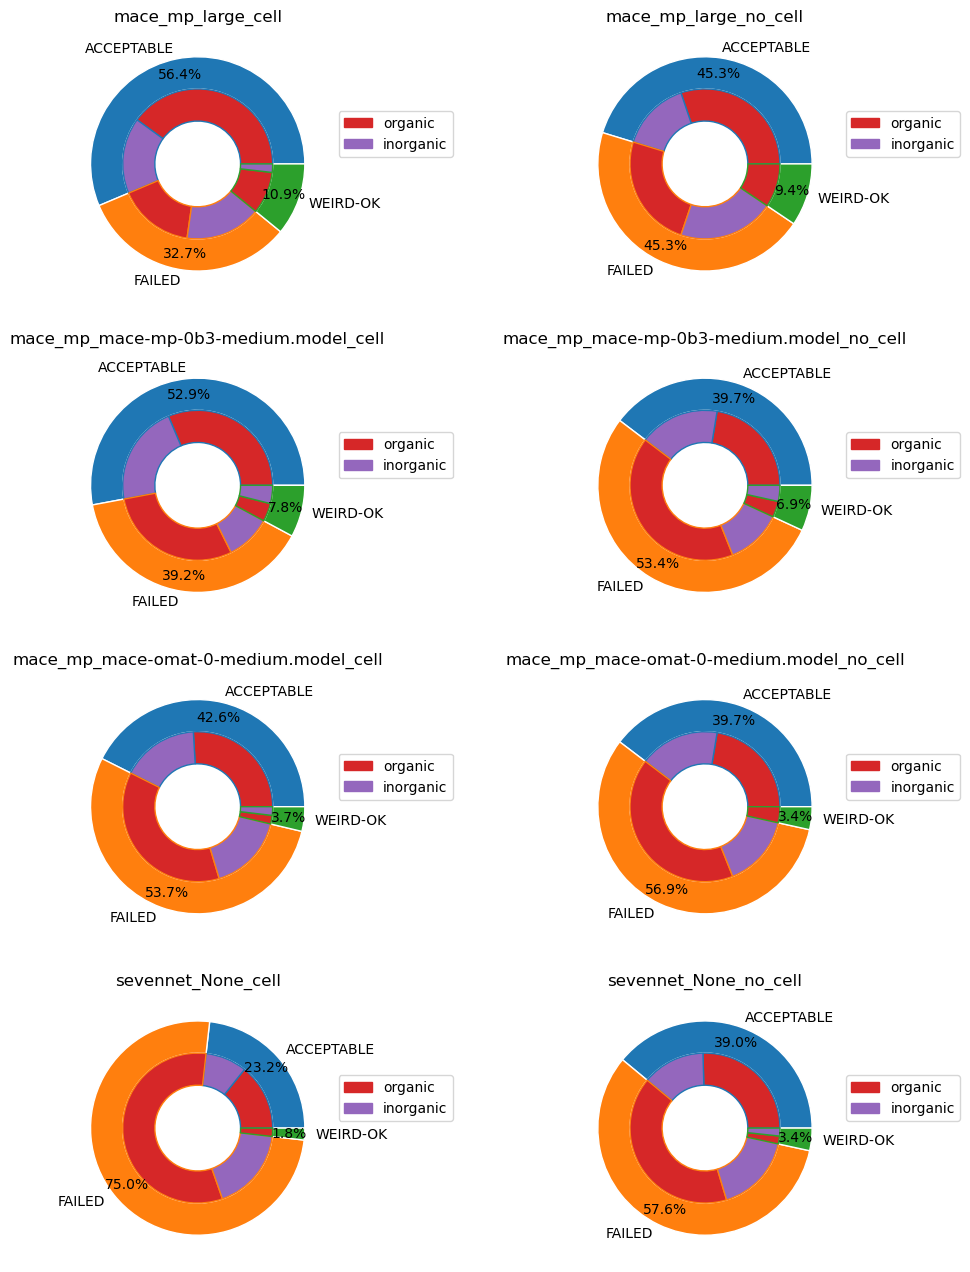

In [101]:
fig, axs = plt.subplots(nrow-1, ncol, figsize=(12, 16))
axs = axs.flatten()

for i, d in enumerate(data[2:]):
    plot_nested_pie(d.df, axs[i], 'imaginary_modes', 'which', value_counts_sorted)
    axs[i].set_title(d.name)

plt.show()

## Comparison with experiment

The compounds were then compared to INS experimental data from the [ISIS INS database](http://wwwisis2.isis.rl.ac.uk/INSdatabase/Theindex.asp)
using the `plot_abins.py` script. For older runs on the original (smaller set of data) only the compounds with TOSCA measurement were
run, while the last runs on the new, larger dataset were run with the `--force-tosca` option to gain data for all compounds, even
if the broadening would be underestimated.

### Environment

```
euphonic            1.3.2
mantid              6.10.20240909.1130
numpy               1.26.4
Pint                0.24.3
scipy               1.14.1
seekpath            2.1.0
spglib              2.5.0
```

1.050682989016069


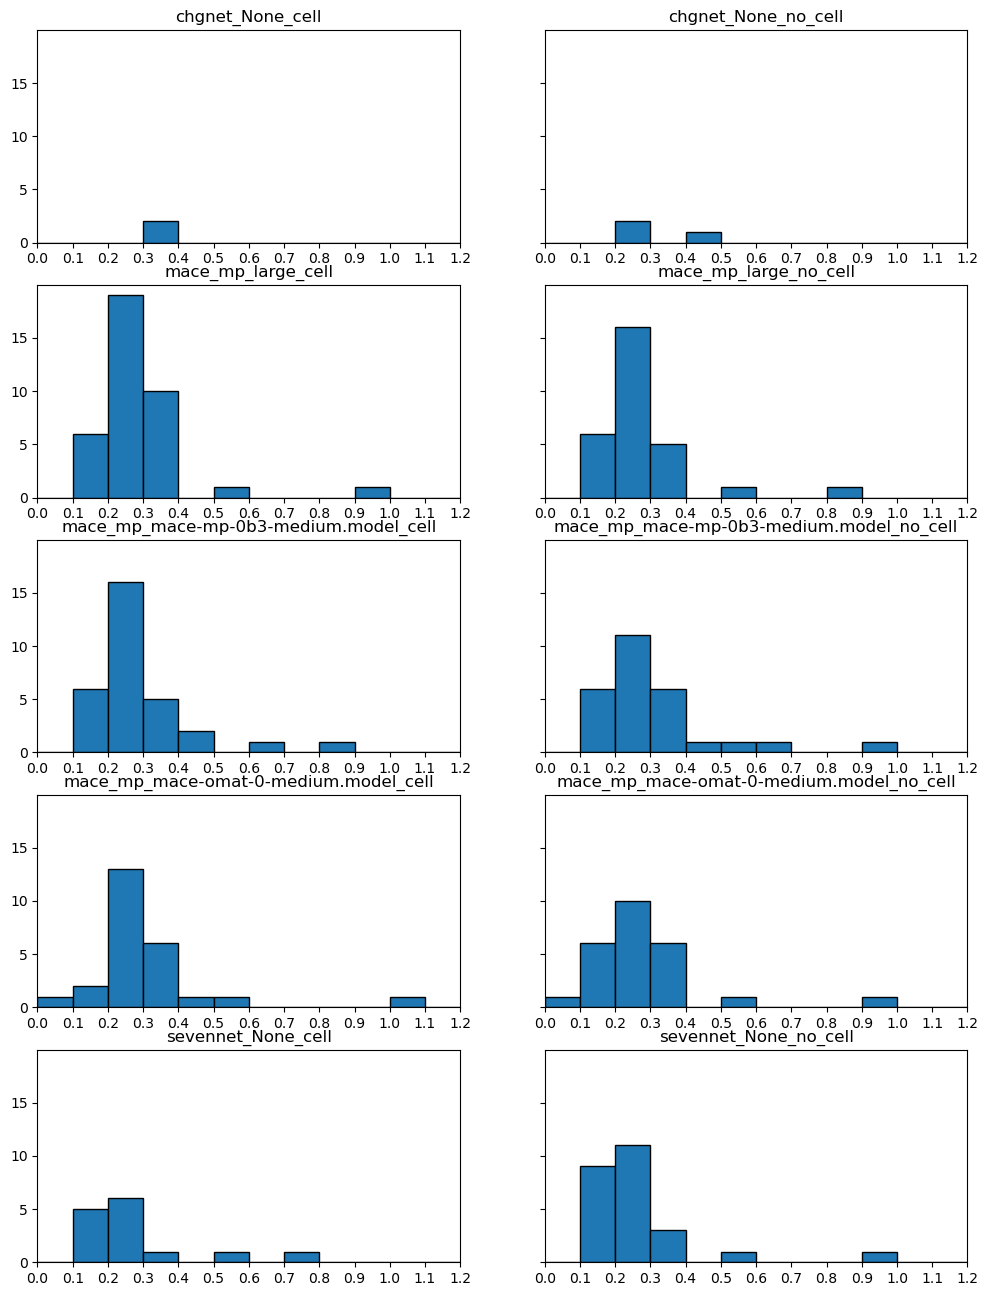

In [104]:
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 16), sharey=True)
axs = axs.flatten()

highest = max([d.df['score_filtered'].max() for d in data])
print(highest)
upper_bound = np.ceil(highest * 10) / 10 + 0.1

for d, ax in zip(data, axs):
    ax.hist(d.df['score_filtered'], np.arange(0, upper_bound, 0.1), ec='black')
    
    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(0, upper_bound, 0.1))

    ax.set_title(d.name)

plt.show()

1.050682989016069


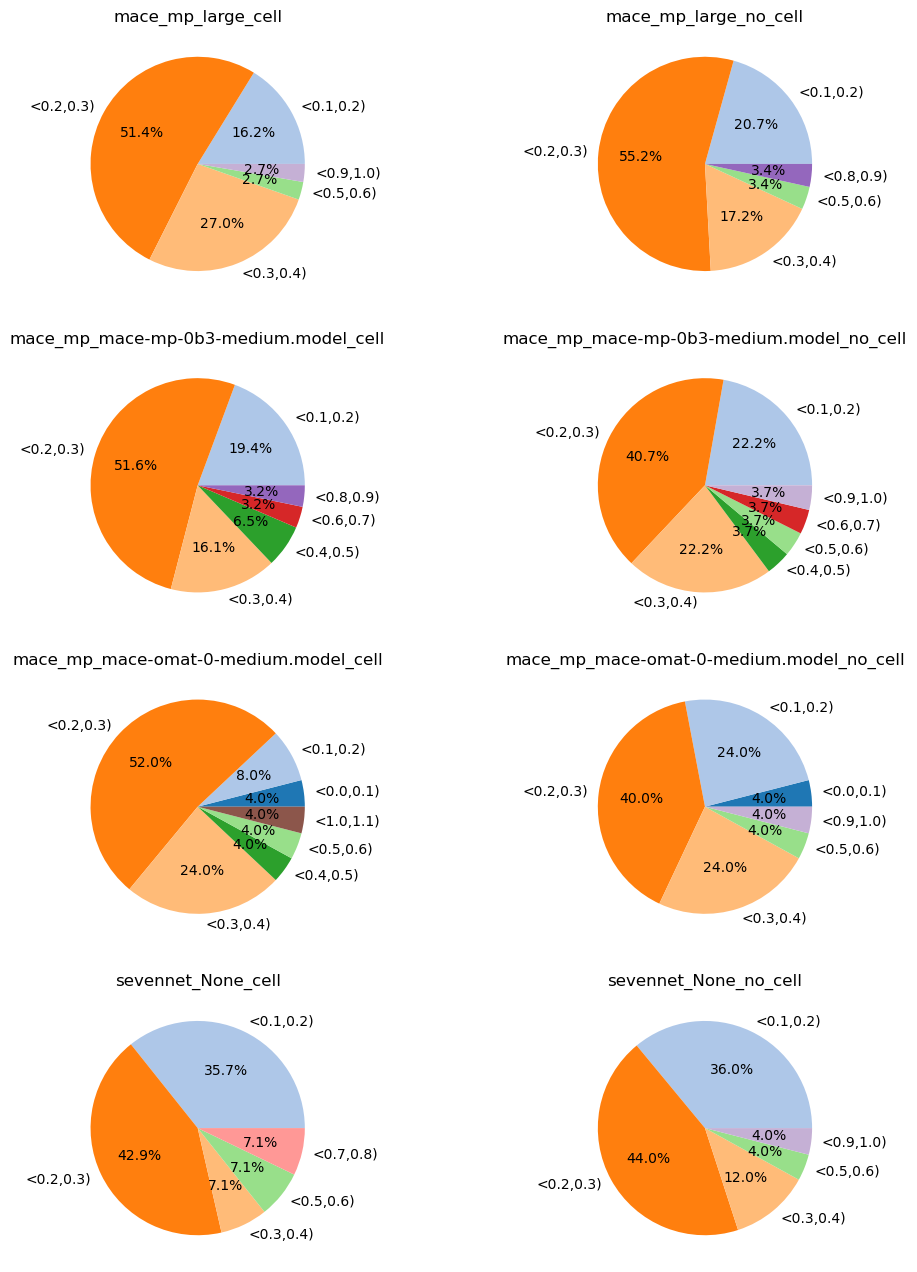

In [126]:
fig, axs = plt.subplots(nrow-1, ncol, figsize=(12, 16))
axs = axs.flatten()

highest = max([d.df['score_filtered'].max() for d in data])
print(highest)
upper_bound = np.ceil(highest * 10) / 10 + 0.1
bins = np.arange(0, upper_bound, 0.1)

for i, d in enumerate(data[2:]):
    plot_hist_pie(d.df, axs[i], 'score_filtered', bins, False)
    
    axs[i].set_title(d.name)

plt.show()

1.050682989016069


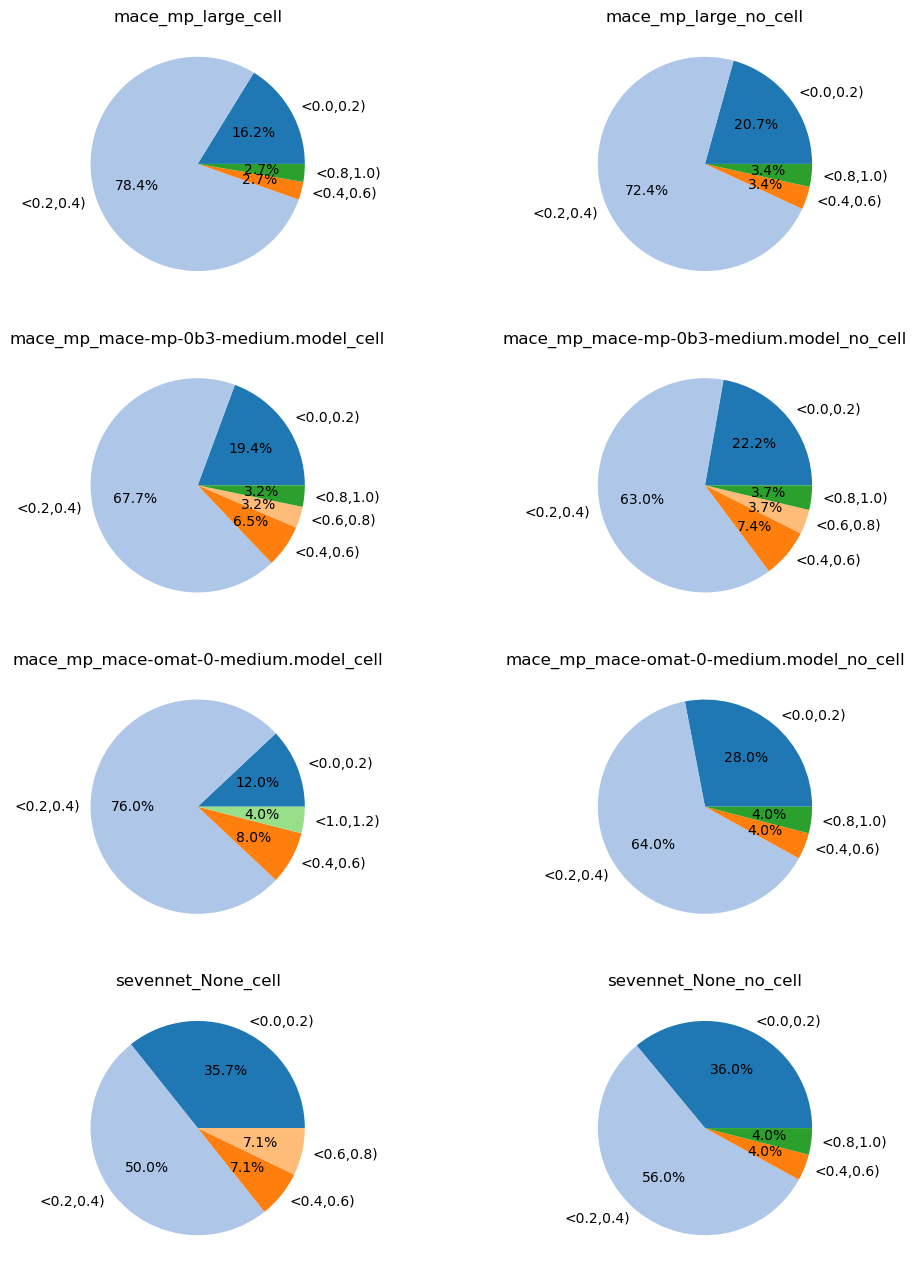

In [125]:
fig, axs = plt.subplots(nrow-1, ncol, figsize=(12, 16))
axs = axs.flatten()

highest = max([d.df['score_filtered'].max() for d in data])
print(highest)
upper_bound = np.ceil(highest * 10) / 10 + 0.1
bins = np.arange(0, upper_bound, 0.2)

for i, d in enumerate(data[2:]):
    plot_hist_pie(d.df, axs[i], 'score_filtered', bins, False)
    
    axs[i].set_title(d.name)

plt.show()

0.9333053448975084


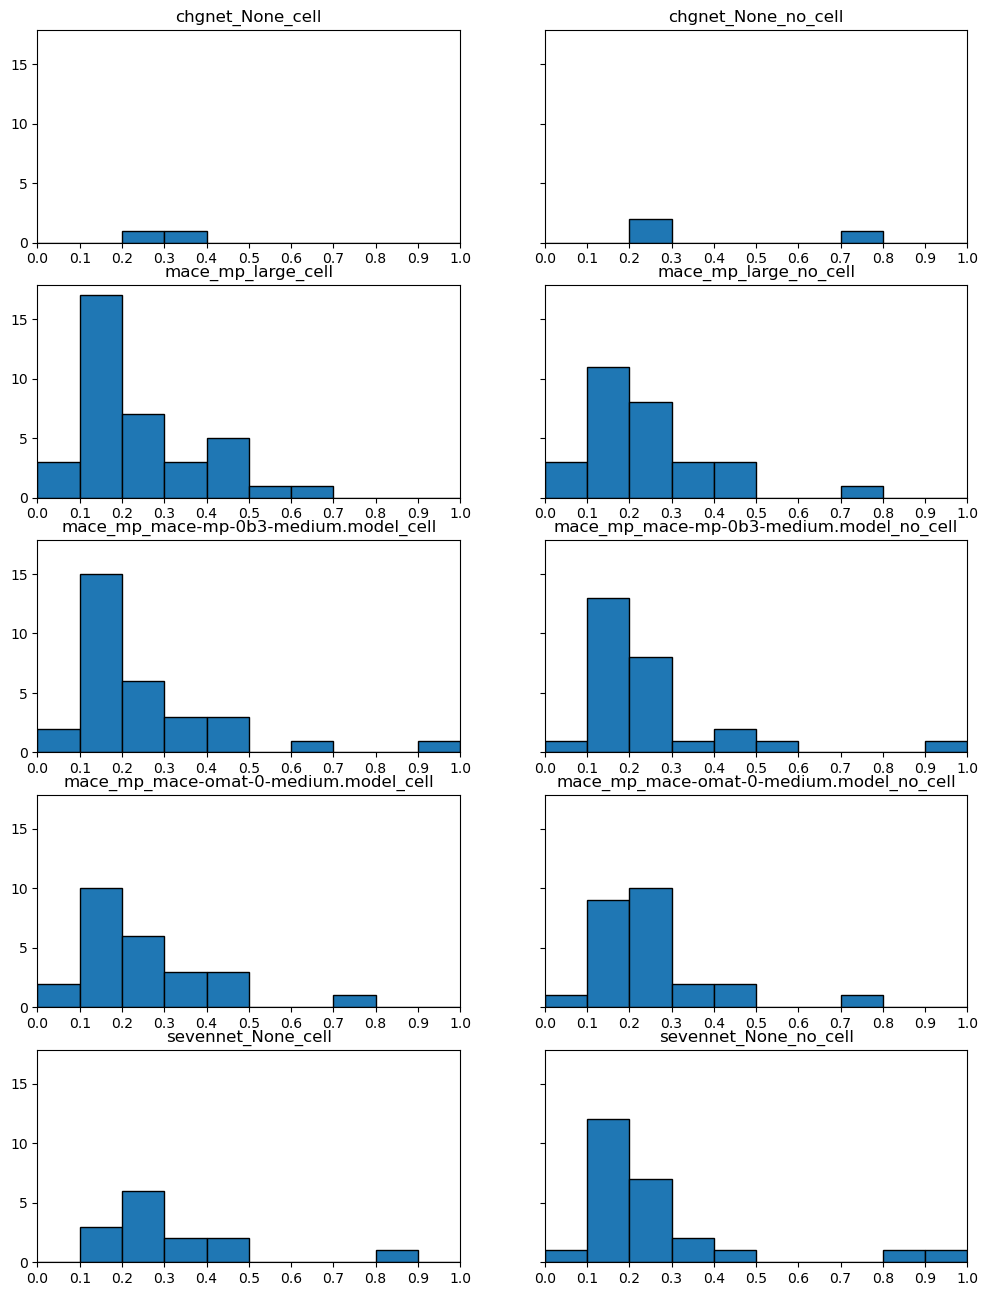

In [105]:
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 16), sharey=True)
axs = axs.flatten()

highest = max([d.df['score_direct'].max() for d in data])
print(highest)
upper_bound = np.ceil(highest * 10) / 10 + 0.1

for d, ax in zip(data, axs):
    ax.hist(d.df['score_direct'], np.arange(0, upper_bound, 0.1), ec='black')
    
    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(0, upper_bound, 0.1))

    ax.set_title(d.name)

plt.show()

0.9333053448975084


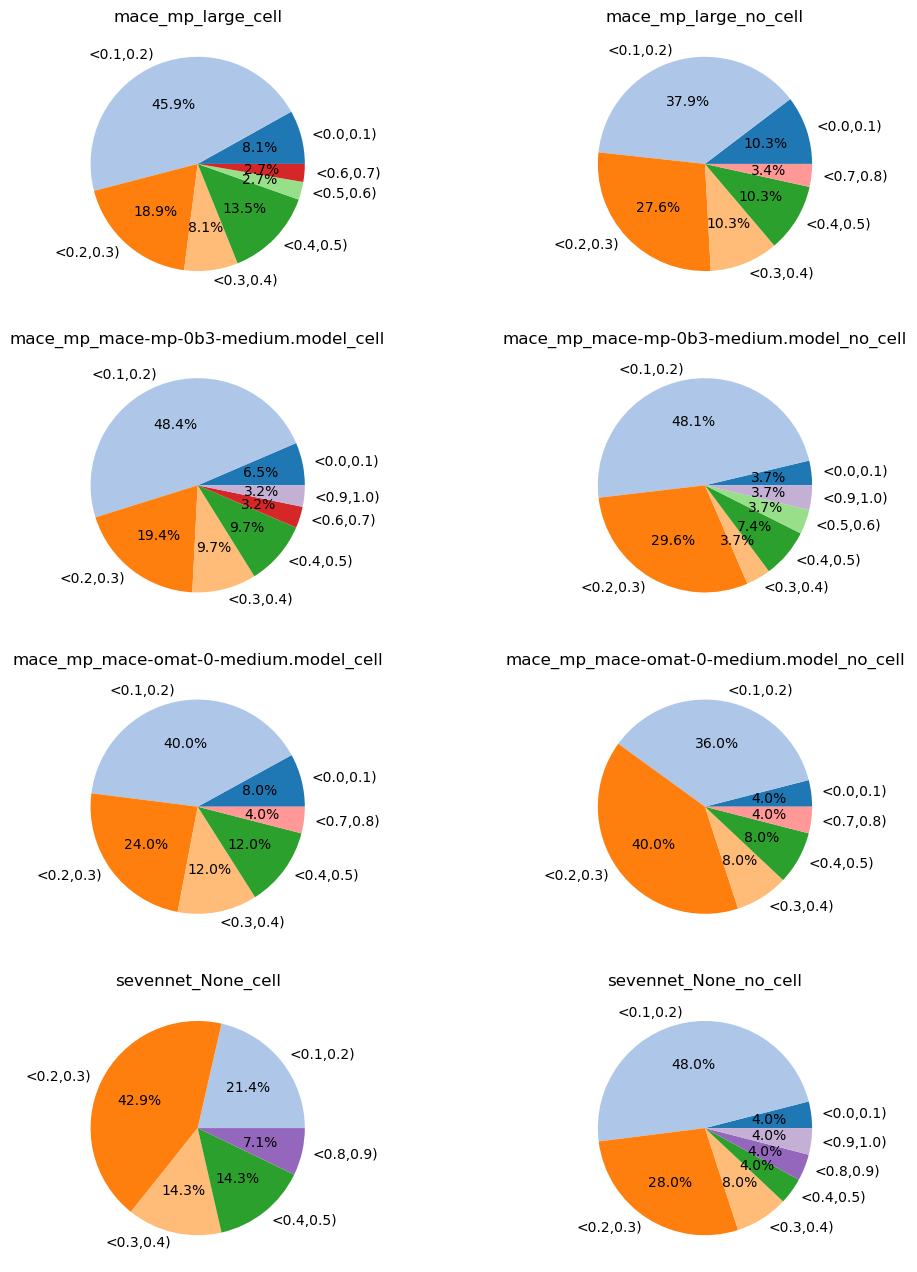

In [124]:
fig, axs = plt.subplots(nrow-1, ncol, figsize=(12, 16))
axs = axs.flatten()
#labels = list(set().union(*[d.df['imaginary_modes'].dropna().unique() for d in data]))
highest = max([d.df['score_direct'].max() for d in data])
print(highest)
upper_bound = np.ceil(highest * 10) / 10 + 0.1
bins = np.arange(0, upper_bound, 0.1)

for i, d in enumerate(data[2:]):
    plot_hist_pie(d.df, axs[i], 'score_direct', bins, False)
    
    axs[i].set_title(d.name)

plt.show()

0.9333053448975084


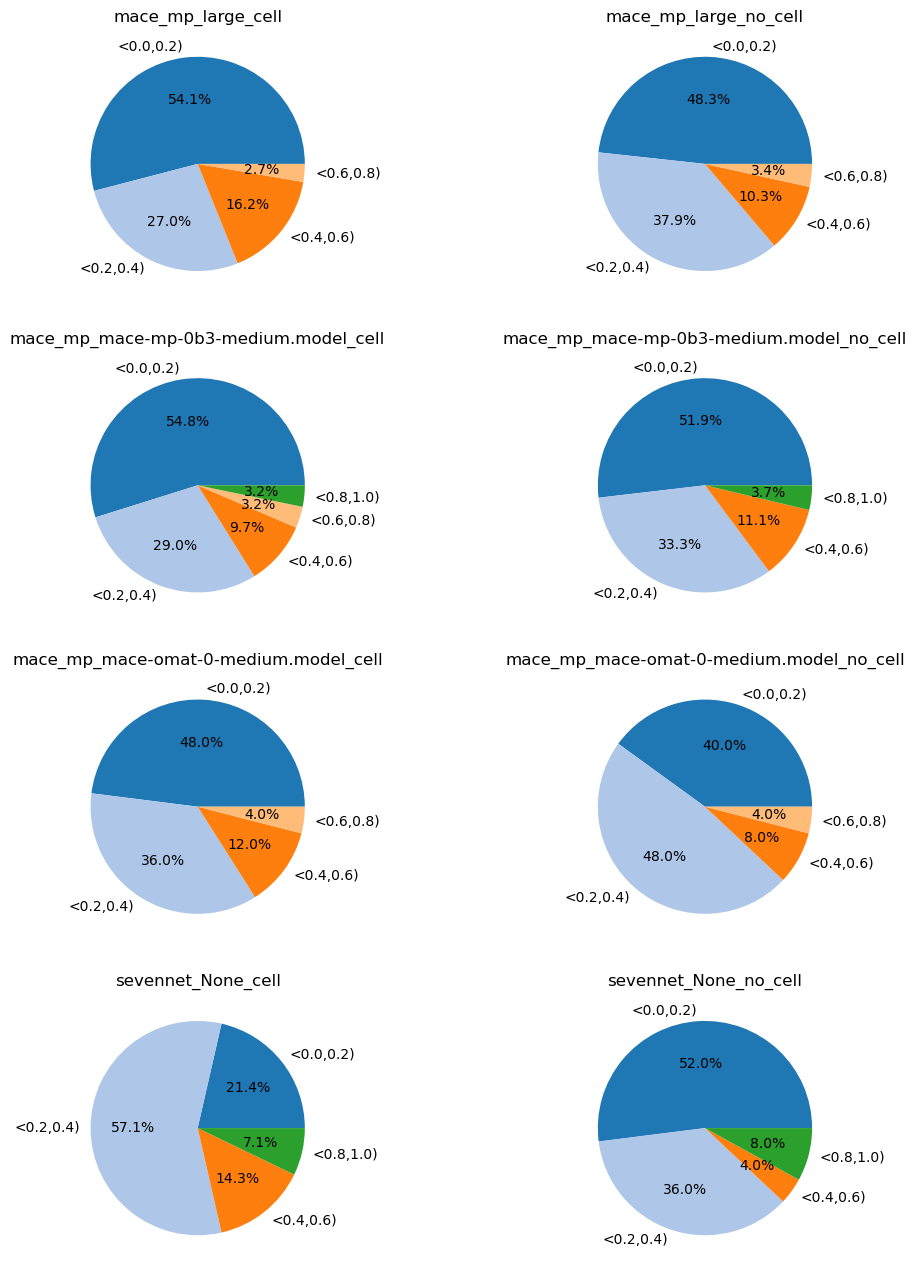

In [123]:
fig, axs = plt.subplots(nrow-1, ncol, figsize=(12, 16))
axs = axs.flatten()
#labels = list(set().union(*[d.df['imaginary_modes'].dropna().unique() for d in data]))
highest = max([d.df['score_direct'].max() for d in data])
print(highest)
upper_bound = np.ceil(highest * 10) / 10 + 0.1
bins = np.arange(0, upper_bound, 0.2)

for i, d in enumerate(data[2:]):
    plot_hist_pie(d.df, axs[i], 'score_direct', bins, False)
    
    axs[i].set_title(d.name)

plt.show()